In [ ]:
#VANESSA MORAA 21-2151
#importing important libraries that we're going to use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv") #loading the csv data into the notebook and assigning it to the variable "data"
data

#checking the numbers of missing values if any
data.info()# to find out if the data has null values
data.dropna(inplace=True)#to drop the NA values- inplace=true ensures that the changes are saved

data.info() #confirming that the data has only non null values
data

In [ ]:
data.describe() #getting a statistical deduction of the data in terms of the mean, median,standard deviatiom and the percentiles

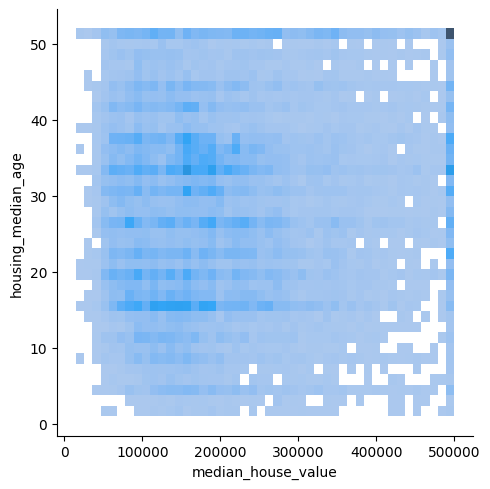

In [ ]:
sns.displot(data,x="median_house_value",y="housing_median_age")#using a heatmap to display the median house value of different houses against their ages.
#we can deduce that the houses aged 50 are very expensive. prices ranginf from 500000, majority of the houses aged 15-40 range from 100000-200000

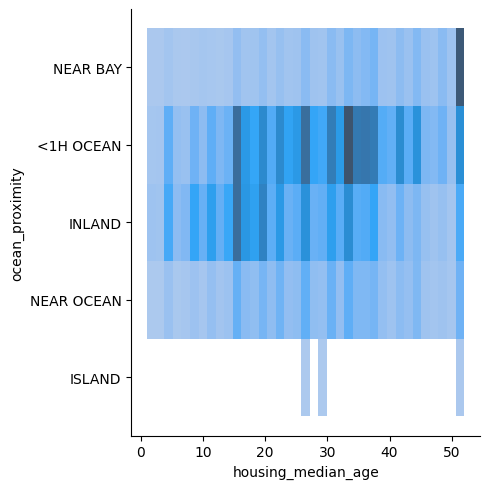

In [ ]:
sns.displot(data,x="housing_median_age",y="ocean_proximity") 
#from this we can tell that the density of most houses aged 50 is mostly found near the bay but also most houses aged 50 are les in the islands
#1hr from the ocean we have houses of all ages. we have a variety as the density of age 10-40 is well represented

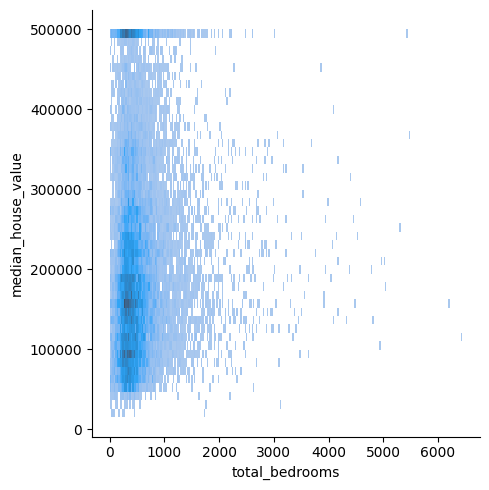

In [ ]:
#using a heatmap to display the median house value of different houses against Total bedrooms available in the area
sns.displot(data,x="total_bedrooms",y="median_house_value")

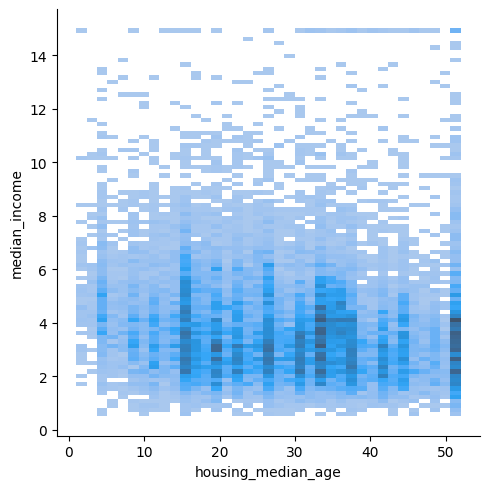

In [ ]:
#using a heatmap to display the median income of different houses against their ages.
sns.displot(data,x="housing_median_age",y="median_income")


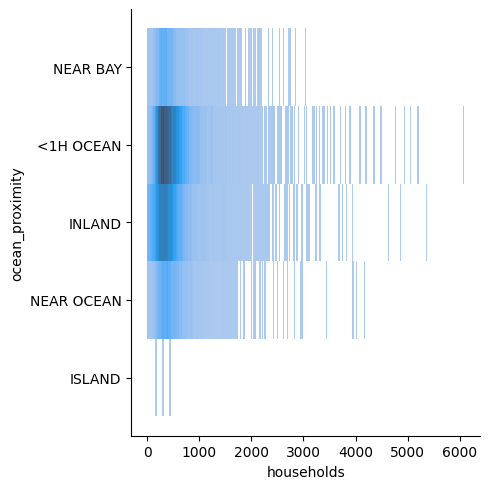

In [ ]:
#using a heatmap to display the median income of different houses against their ages.
sns.displot(data,x="households",y="ocean_proximity")

<Axes: xlabel='latitude', ylabel='longitude'>

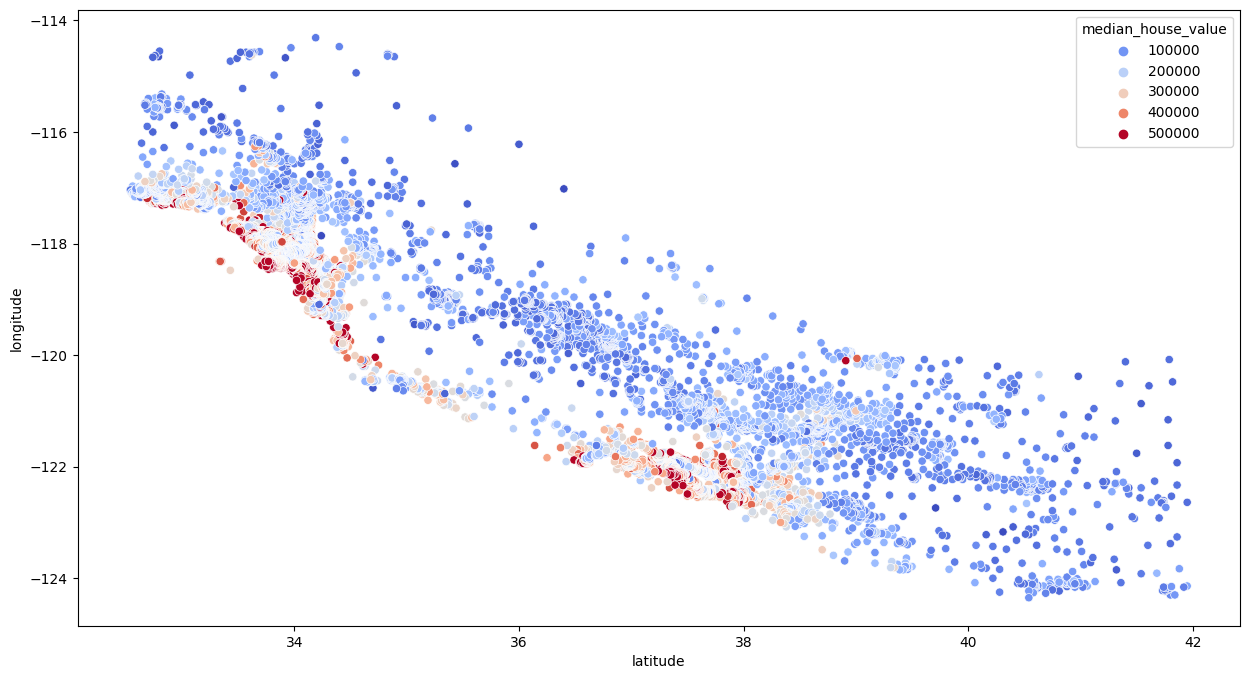

In [ ]:
#using a scatterplot to display the distribution of the houses with their median value
plt.figure(figsize=(15,8))
sns.scatterplot(data,x="latitude",y="longitude",hue="median_house_value",palette="coolwarm")


<Axes: xlabel='latitude', ylabel='longitude'>

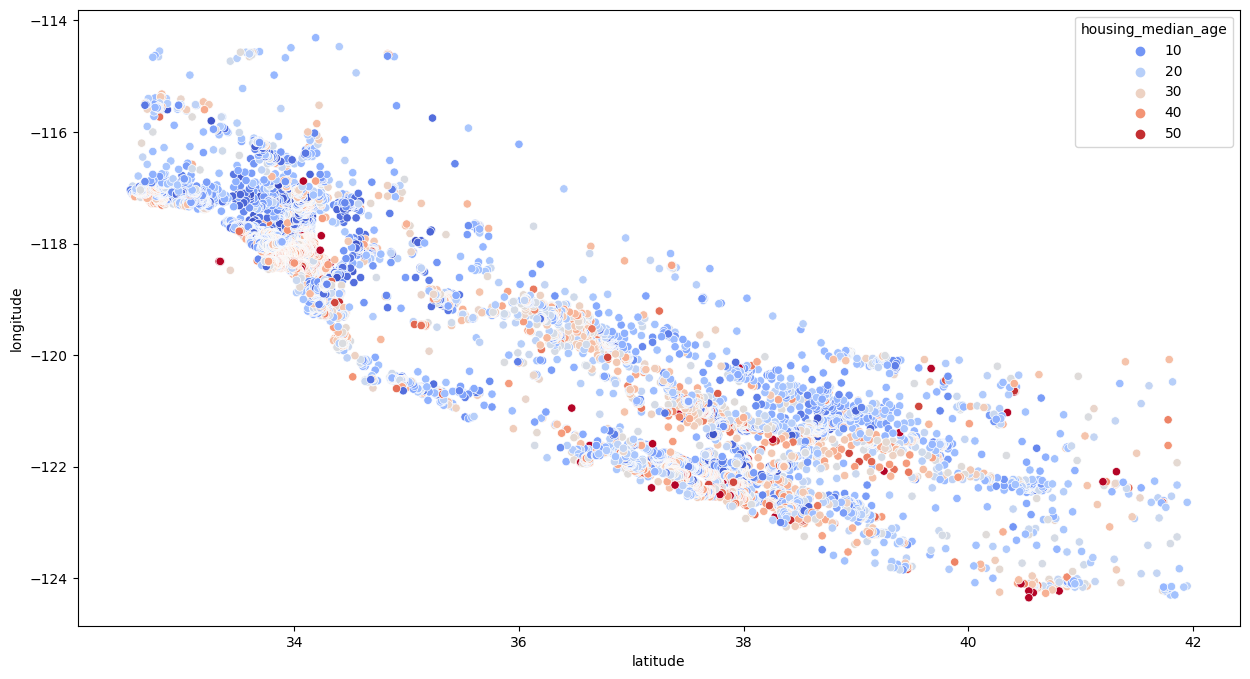

In [ ]:
#using a scatterplot to display the distribution of the houses with their house median age
plt.figure(figsize=(15,8))
sns.scatterplot(data,x="latitude",y="longitude",hue="housing_median_age",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

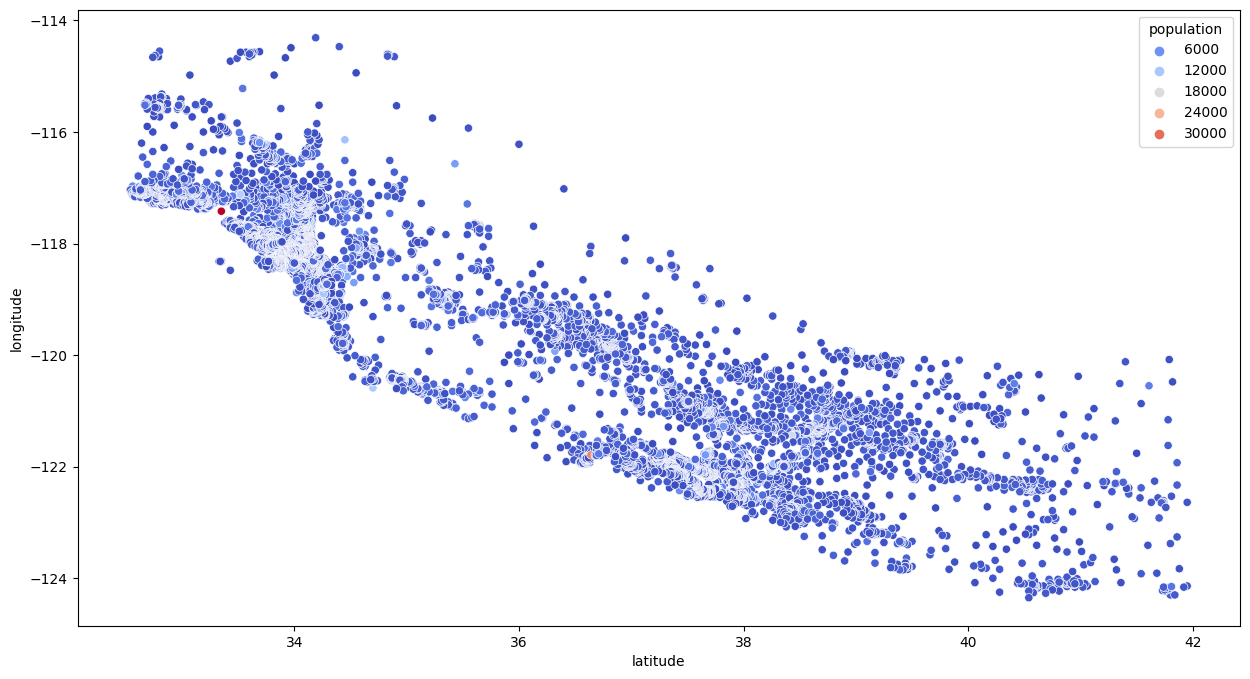

In [ ]:
#using a scatterplot to display the distribution of the houses with the popolation in the area
plt.figure(figsize=(15,8))
sns.scatterplot(data,x="latitude",y="longitude",hue="population",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

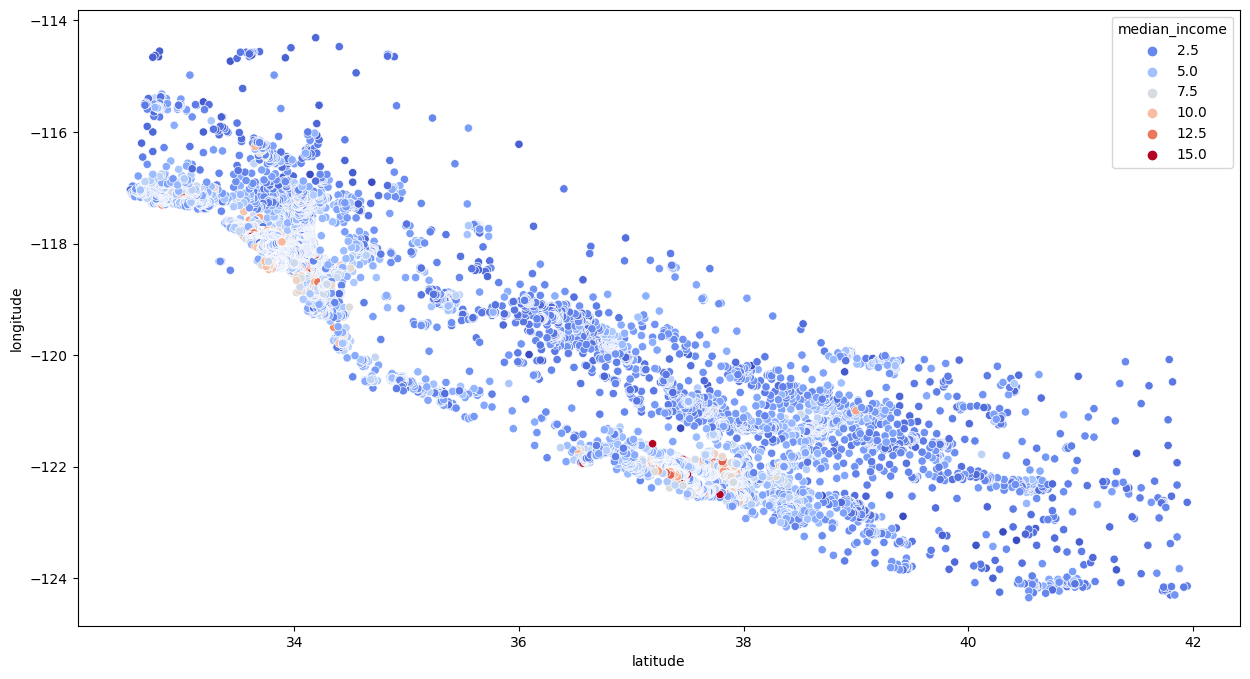

In [ ]:
#using a scatterplot to display the distribution of the houses with the median income of the people there
plt.figure(figsize=(15,8))
sns.scatterplot(data,x="latitude",y="longitude",hue="median_income",palette="coolwarm")

In [ ]:
#splitting the data into training and testing data by dividing the data into x and y data.
from sklearn.model_selection import train_test_split #importing the library that can help us split the data
#defining x and y data
x = data.drop(['median_house_value'],axis=1) # dropping the value median_house_value so that we can make it part of the y axis 
y = data['median_house_value'] #only has the median house value
x
y


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
#splitting x and y data with a test size of 0.2 which will be reserved for evaluation and picking a random state to evaluate
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=50)


In [ ]:
x_train
x_test


In [ ]:
#joining x training data with y training data
train_data = x_train.join(y_train)
train_data



In [ ]:
#joining x tresting data with y tresting data
test_data= x_test.join(y_test)
test_data

In [ ]:
#to get a histogram of the data for the distribution of the individual features of train data
train_data.hist(figsize=(15,8))#figsize to define the size of the histograms

In [ ]:
#to get a histogram of the data for the distribution of the individual features of test data
test_data.hist(figsize=(15,8))#figsize to define the size of the histograms

In [ ]:
#shows the correlation value of the train data
#ie the median_house_value correlates quite strongly with the median_income, the latitude is negatively correlated with the median house value
#correlations show the the relationship of a variable with another negative correlation show values that oppose one another while positive correlations show the relationship between two variables that change together
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu" )

In [ ]:
#shows the correlation value of thes test data
#ie the median_house_value correlates quite strongly with the median_income, the latitude is negatively correlated with the median house value
#correlations show the the relationship of a variable with another negative correlation show values that oppose one another while positive correlations show the relationship between two variables that change together
plt.figure(figsize=(15,8))
sns.heatmap(test_data.corr(),annot=True, cmap="YlGnBu" )

In [ ]:
#preprocessing so as to reduce the skewedness of the train data
train_data["total_rooms"]= np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+1)
train_data["population"]=np.log(train_data["population"]+1)
train_data["households"]=np.log(train_data["households"]+1)

train_data.hist(figsize=(15,8))
sns.displot(train_data["median_house_value"])

In [ ]:
#preprocessing so as to reduce the skewedness of the test data 
test_data["total_rooms"]= np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+1)
test_data["population"]=np.log(test_data["population"]+1)
test_data["households"]=np.log(test_data["households"]+1)

test_data.hist(figsize=(15,8))
sns.displot(test_data["median_house_value"])

In [ ]:
#The median house values in the train data
train_data["median_house_value"]=np.log(train_data["median_house_value"])
sns.displot(train_data["median_house_value"])
#The median house values in the test data
test_data["median_house_value"]=np.log(test_data["median_house_value"])
sns.displot(test_data["median_house_value"])

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11084,-117.84,33.84,23.0,8.725507,7.029973,7.943783,6.979145,5.0629,<1H OCEAN,12.357076
19175,-122.65,38.37,15.0,7.522400,5.638355,6.668228,5.645447,5.7204,<1H OCEAN,12.748688
19096,-122.60,38.24,16.0,7.871693,6.033086,7.129298,5.958425,4.8603,<1H OCEAN,12.198040
6675,-118.12,34.16,52.0,7.704812,6.082219,7.100027,6.047372,5.0237,<1H OCEAN,12.396280
7487,-118.21,33.92,28.0,7.989560,6.911747,8.423322,6.836259,1.9026,<1H OCEAN,11.789799
...,...,...,...,...,...,...,...,...,...,...
14706,-117.05,32.81,17.0,7.542213,5.680173,6.648985,5.710427,5.6402,<1H OCEAN,12.339729
15801,-122.44,37.76,30.0,8.535033,7.099202,7.568379,7.038784,4.6053,NEAR BAY,12.863852
10225,-117.89,33.87,32.0,7.033506,5.379897,6.542472,5.433722,3.3594,<1H OCEAN,12.216518
5658,-118.30,33.74,20.0,7.873217,6.513230,7.077498,6.408529,3.9167,NEAR OCEAN,12.560946


In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17497,-119.80,34.43,22.0,7.953670,6.216606,7.284135,6.120297,5.6604,NEAR OCEAN,12.529604
6787,-118.15,34.09,27.0,7.568379,6.133398,7.284135,5.948035,2.8062,<1H OCEAN,12.169409
15315,-117.38,33.20,26.0,7.264030,5.958425,6.882437,5.762051,1.3903,NEAR OCEAN,12.124863
11213,-117.91,33.81,18.0,7.074963,5.869297,6.661855,5.831882,2.5625,<1H OCEAN,11.938847
579,-122.07,37.71,40.0,7.500529,5.713733,6.616065,5.602119,5.3015,NEAR BAY,12.448627
...,...,...,...,...,...,...,...,...,...,...
19427,-121.00,37.71,52.0,4.634729,3.178054,3.583519,3.526361,2.2500,INLAND,12.072541
7863,-118.12,33.90,35.0,8.154500,6.594413,7.542213,6.513230,2.9375,<1H OCEAN,12.238056
12265,-116.88,33.74,20.0,8.043021,6.436150,6.908755,6.232448,1.5982,INLAND,11.849398
10465,-117.76,33.48,38.0,8.251403,6.697034,7.195187,6.456770,5.0044,<1H OCEAN,12.851079


In [ ]:
#dropping the ocean proximity column train data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [ ]:
#dropping the ocean proximity column for test data
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data
plt.figure(figsize=(15,8))
sns.heatmap(test_data.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

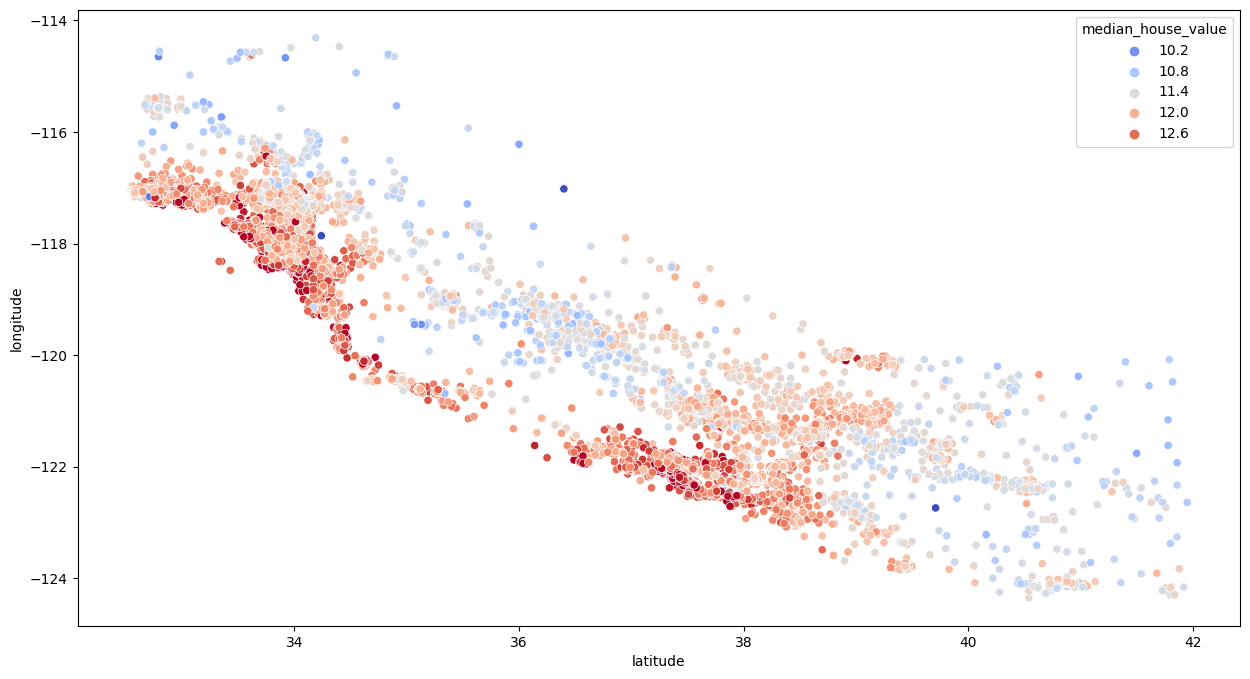

In [ ]:
plt.figure(figsize=(15,8)) #plotting the figures for longitudes and latitudes
#combining the longitudes and latitudes together to see the median house values of different houses from the ocean to inland
#the more red it gets the more expensive the house is..the coast is near the reds
sns.scatterplot(x="latitude",y="longitude",data=train_data, hue="median_house_value",palette="coolwarm")

In [ ]:
plt.figure(figsize=(15,8)) #plotting the figures for longitudes and latitudes
#combining the longitudes and latitudes together to see the median house values of different houses from the ocean to inland
#the more red it gets the more expensive the house is..the coast is near the reds
sns.scatterplot(x="latitude",y="longitude",data=test_data, hue="median_house_value",palette="coolwarm")

In [ ]:

train_data['total_bedrooms']= train_data['total_bedrooms']/train_data['total_rooms'] #calculating the average number of bedrooms from the total number of rooms in train data
train_data['household_rooms']= train_data['total_rooms']/train_data['households'] #calculating the average number of household rooms from the total rooms in the area in train data

In [ ]:
test_data['total_bedrooms']= test_data['total_bedrooms']/test_data['total_rooms'] #calculating the average number of bedrooms from the total number of rooms in test data
test_data['household_rooms']= test_data['total_rooms']/test_data['households'] #calculating the average number of household rooms from the total rooms in the area in testdata

In [ ]:
#visualization using the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
#training a simple linear regression model
from sklearn.linear_model import LinearRegression#importing the libraries

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler=StandardScaler()
#put the y value to only have median home value while the x train to have all the other values
x_train,y_train = train_data.drop(["median_house_value"],axis=1),train_data["median_house_value"]#splitting the values into x and y for training and dropping our target value
linear_model= LinearRegression() # specifying the type of regression we want to use and loading the model
linear_model.fit(x_train,y_train)#training the model

LinearRegression()

In [ ]:
#put the y value to only have median home value while the x train to have all the other values
x_test,y_test = test_data.drop(["median_house_value"],axis=1),test_data["median_house_value"]#splitting the values into x and y for testing and dropping our target value
linear_model= LinearRegression() # specifying the type of regression we want to use and loading the model
linear_model.fit(x_test,y_test)#testing the model

In [ ]:
training_data_prediction=linear_model.predict(x_train) #predicting the accuracy of the trained data

In [ ]:
testing_data_prediction=linear_model.predict(x_test) #predicting the accuracy of the data being tested

In [ ]:
#calculating the error that this model can give the Regression square error
R_error=metrics.r2_score(y_train,training_data_prediction)

print("R square error:",R_error)#this is the value of the error from the calculations(0.6758)

In [ ]:
#calculating the error that this model can give the Regression square error
S_error=metrics.r2_score(y_test,testing_data_prediction)

print("S square error:",S_error)#this is the value of the error from the calculations(0.6915)

Text(0.5, 1.0, 'actual prices vs predicted prices')

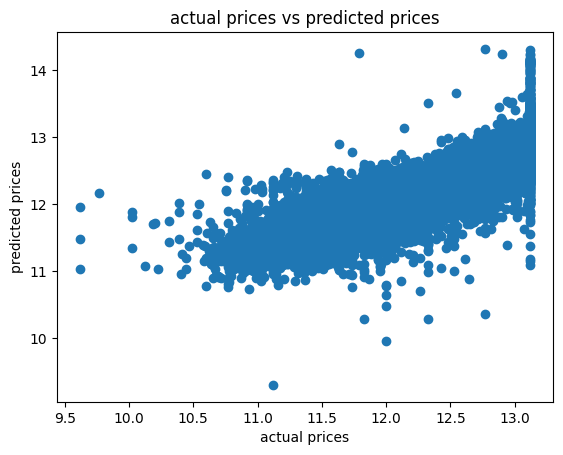

In [ ]:
#plotting the price estimations of the trained data vs all the other factors
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")

Text(0.5, 1.0, 'actual prices vs predicted prices')

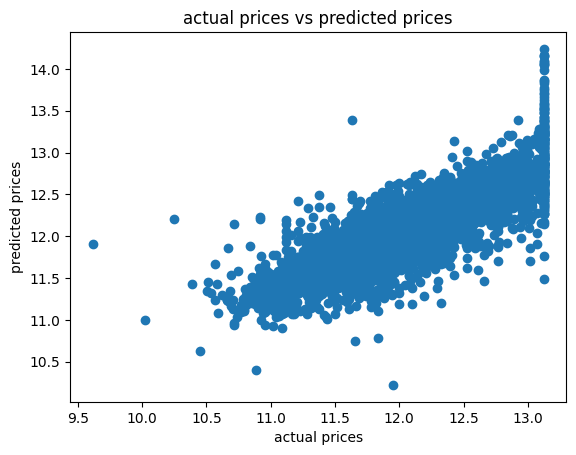

In [ ]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")